In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

import pandas as pd
import numpy as np
import requests

from IPython.display import *

pd.set_option('display.max_rows', 200)

# Create A DataFrame

In [3]:
df = pd.read_csv('data/cape.csv', index_col='section_id')

df

,instructor,course,term,enroll,evals,recommend_class,recommend_instructor,study_hours_per_week,average_grade_expected,average_grade_received,link,first_name,last_name,class_id,department,class_name
section_id,,,,,,,,,,,,,,,,
594782,"Schwake, Sonja A.",ANTH 3 - World Prehistory (A),SU07,16,15,1.000,1.000,6.63,3.29,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Sonja A,Schwake,ANTH 3,ANTH,World Prehistory
594783,"Buehler, Lukas K.",BIBC 100 - Structural Biochemistry (A),SU07,115,90,0.857,0.871,6.97,3.35,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Lukas K,Buehler,BIBC 100,BIBC,Structural Biochemistry
594787,"Coleman, Aaron B.",BIBC 102 - Metabolic Biochemistry (A),SU07,108,82,0.888,0.938,6.72,3.10,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Aaron B,Coleman,BIBC 102,BIBC,Metabolic Biochemistry
594816,"Towb, Par",BILD 1 - The Cell (A),SU07,98,74,0.930,0.887,7.73,3.47,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Par,Towb,BILD 1,BILD,The Cell
594820,"Towb, Par",BILD 2 - Multicellular Life (A),SU07,96,73,0.944,0.958,6.69,3.48,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Par,Towb,BILD 2,BILD,Multicellular Life
594830,"Gustafson-Brown, Cindy",BILD 10 - Fundamental Concepts/Modrn Bio (A),SU07,36,25,0.708,0.708,5.25,2.71,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Cindy,Gustafson-Brown,BILD 10,BILD,Fundamental Concepts/Modrn Bio
594833,"Saier, Milton H.",BILD 18 - Human Impact on the Environmnt (A),SU07,23,17,1.000,1.000,2.85,3.80,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Milton H,Saier,BILD 18,BILD,Human Impact on the Environmnt
594835,"Ghiara, Jayant",BIMM 100 - Molecular Biology (A),SU07,187,106,0.938,0.980,6.48,3.44,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Jayant,Ghiara,BIMM 100,BIMM,Molecular Biology
594854,"Zupanc, Gunther Karl-Heinz",BIPN 142 - Systems Neurobiology (A),SU07,39,29,0.929,0.926,5.91,3.19,NaN,http://cape.ucsd.edu/scripts/detailedStats.asp...,Gunther Karl-Heinz,Zupanc,BIPN 142,BIPN,Systems Neurobiology


# Let's grab all classes with grades

In [26]:
grades = df.ix[df.average_grade_received.dropna().index]

# Group By Department
departments = grades.groupby('department')

# Split -> Apply -> Combine
dept_averages = departments.aggregate(np.mean).copy().reset_index()
dept_median   = departments.aggregate(np.median).copy().reset_index()

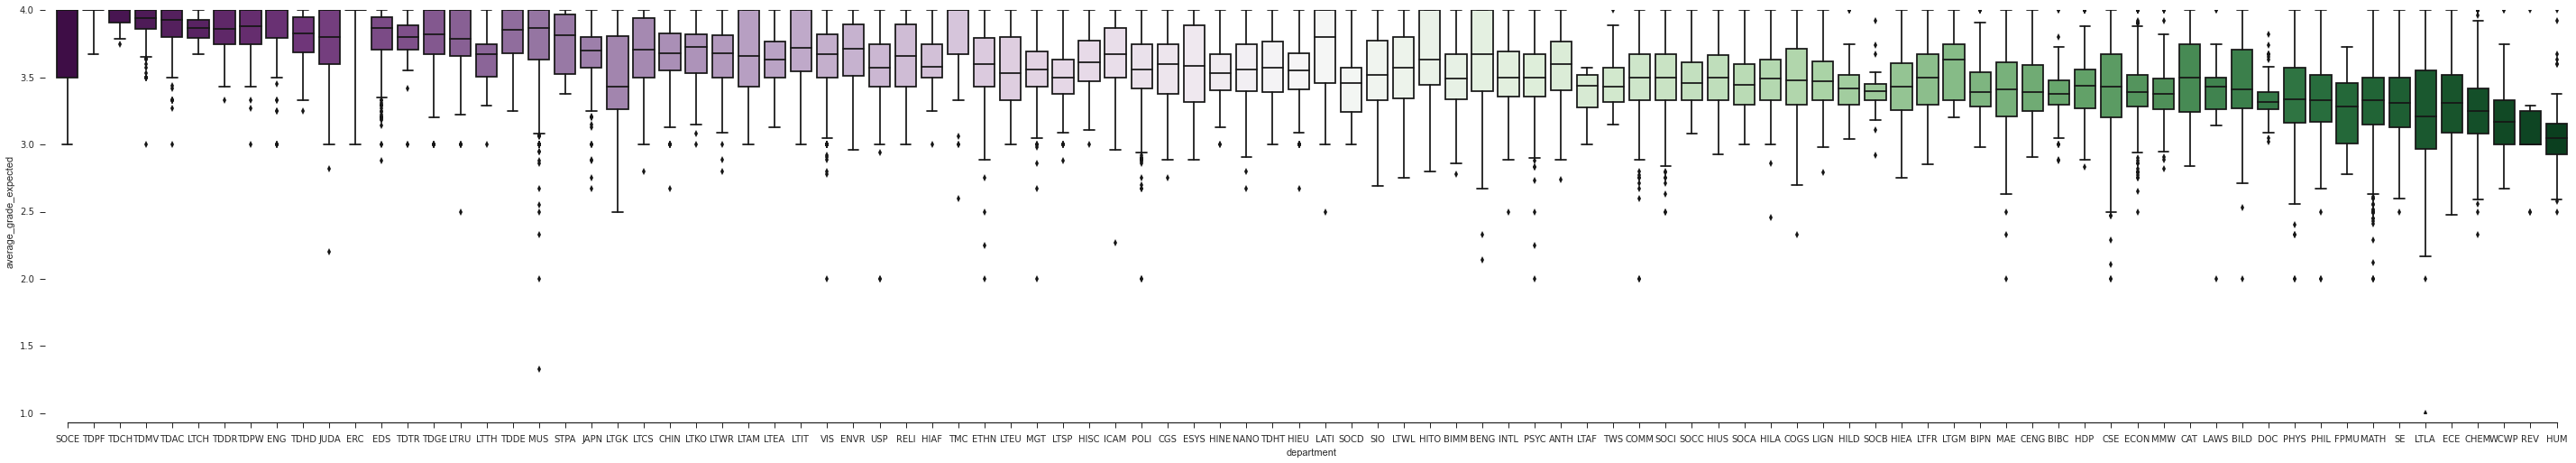

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sort_by_dept = reversed(
    dept_averages
        .ix[dept_averages.average_grade_expected.sort(inplace=False).index]
        .department
        .values
)

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(50, 8)

sns.boxplot(
    x="department",
    y="average_grade_expected",
    data=df,
    palette="PRGn",
    order=sort_by_dept
)
sns.despine(offset=10, trim=True)
sns.despine(left=True)

# Some Data Analysis

In [67]:
import graphlab as gl

gl.canvas.set_target('ipynb')

sf = gl.SFrame(df)

# What is the Most Popular Class Offered?

In [68]:
display_javascript(sf['course'].show())

# Average Enrollment

In [69]:
display_javascript(sf['enroll'].show())

# Average Evaluations Submitted

In [70]:
display_javascript(sf['evals'].show())

# CAPE Participation

## Average Enrollment vs Average Evals

In [71]:
display_javascript((sf['evals'] / sf['enroll']).show())

# Average Grade Expected

In [72]:
display_javascript(sf['average_grade_expected'].show())

# Average Grade Received

In [73]:
grade = sf['average_grade_received']

display_javascript(grade[grade != ''].astype(float).show())

# Average Grade Recieved by Department

In [74]:
departments = sorted(sf['department'].unique())

In [75]:
for department in departments:
    try:
        print('Average Grade Distribution for Department {department}'.format(department=department))
        dept_grade = sf[sf['department'] == department]['average_grade_received']
        display_javascript(dept_grade[dept_grade != ''].astype(float).show())
    except ZeroDivisionError:
        print("Nobody has ever submitted their grades in this department", end='\n\n')

Average Grade Distribution for Department ANTH


Average Grade Distribution for Department BENG


Average Grade Distribution for Department BIBC


Average Grade Distribution for Department BILD


Average Grade Distribution for Department BIMM


Average Grade Distribution for Department BIPN


Average Grade Distribution for Department CAT


Average Grade Distribution for Department CENG


Average Grade Distribution for Department CGS


Average Grade Distribution for Department CHEM


Average Grade Distribution for Department CHIN


Average Grade Distribution for Department COGS


Average Grade Distribution for Department COMM


Average Grade Distribution for Department CONT
Nobody has ever submitted their grades in this department

Average Grade Distribution for Department CSE


Average Grade Distribution for Department DOC


Average Grade Distribution for Department ECE


Average Grade Distribution for Department ECON


Average Grade Distribution for Department EDS


Average Grade Distribution for Department ENG


Average Grade Distribution for Department ENVR


Average Grade Distribution for Department ERC


Average Grade Distribution for Department ESYS


Average Grade Distribution for Department ETHN


Average Grade Distribution for Department FILM
Nobody has ever submitted their grades in this department

Average Grade Distribution for Department FPMU


Average Grade Distribution for Department HDP


Average Grade Distribution for Department HIAF


Average Grade Distribution for Department HIEA


Average Grade Distribution for Department HIEU


Average Grade Distribution for Department HILA


Average Grade Distribution for Department HILD


Average Grade Distribution for Department HINE


Average Grade Distribution for Department HISC


Average Grade Distribution for Department HITO


Average Grade Distribution for Department HIUS


Average Grade Distribution for Department HUM


Average Grade Distribution for Department ICAM


Average Grade Distribution for Department INTL


Average Grade Distribution for Department JAPN


Average Grade Distribution for Department JUDA


Average Grade Distribution for Department LATI


Average Grade Distribution for Department LAWS


Average Grade Distribution for Department LIGN


Average Grade Distribution for Department LTAF


Average Grade Distribution for Department LTAM


Average Grade Distribution for Department LTCH


Average Grade Distribution for Department LTCS


Average Grade Distribution for Department LTEA


Average Grade Distribution for Department LTEU


Average Grade Distribution for Department LTFR


Average Grade Distribution for Department LTGK


Average Grade Distribution for Department LTGM


Average Grade Distribution for Department LTIT


Average Grade Distribution for Department LTKO


Average Grade Distribution for Department LTLA


Average Grade Distribution for Department LTRU


Average Grade Distribution for Department LTSP


Average Grade Distribution for Department LTTH


Average Grade Distribution for Department LTWL


Average Grade Distribution for Department LTWR


Average Grade Distribution for Department MAE


Average Grade Distribution for Department MATH


Average Grade Distribution for Department MGT


Average Grade Distribution for Department MMW


Average Grade Distribution for Department MUIR
Nobody has ever submitted their grades in this department

Average Grade Distribution for Department MUS


Average Grade Distribution for Department NANO


Average Grade Distribution for Department PHIL


Average Grade Distribution for Department PHYS


Average Grade Distribution for Department POLI


Average Grade Distribution for Department PSYC


Average Grade Distribution for Department RELI


Average Grade Distribution for Department REV


Average Grade Distribution for Department SE


Average Grade Distribution for Department SIO


Average Grade Distribution for Department SOCA


Average Grade Distribution for Department SOCB


Average Grade Distribution for Department SOCC


Average Grade Distribution for Department SOCD


Average Grade Distribution for Department SOCE


Average Grade Distribution for Department SOCI


Average Grade Distribution for Department STPA


Average Grade Distribution for Department SXTH
Nobody has ever submitted their grades in this department

Average Grade Distribution for Department TDAC


Average Grade Distribution for Department TDCH


Average Grade Distribution for Department TDDE


Average Grade Distribution for Department TDDR


Average Grade Distribution for Department TDGE


Average Grade Distribution for Department TDHD


Average Grade Distribution for Department TDHT


Average Grade Distribution for Department TDMV


Average Grade Distribution for Department TDPF


Average Grade Distribution for Department TDPW


Average Grade Distribution for Department TDTR


Average Grade Distribution for Department TMC


Average Grade Distribution for Department TWS


Average Grade Distribution for Department USP


Average Grade Distribution for Department VIS


Average Grade Distribution for Department WARR
Nobody has ever submitted their grades in this department

Average Grade Distribution for Department WCWP
